In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot

# Sunspots Data

In [7]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



<AxesSubplot:>

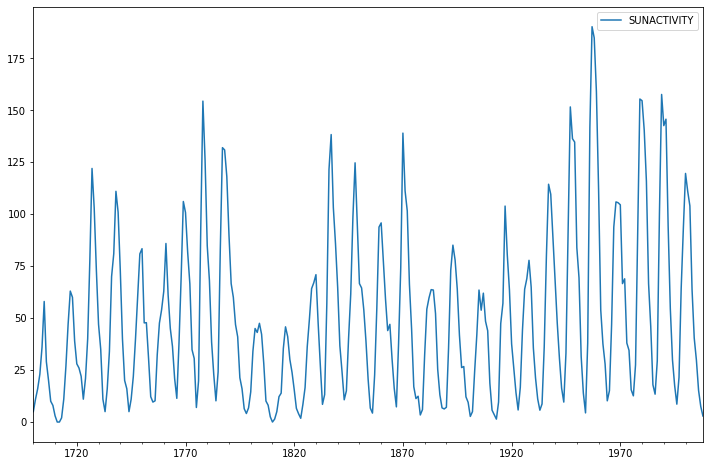

In [28]:
data = sm.datasets.sunspots.load_pandas().data
data.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
data.index.freq = data.index.inferred_freq
del data["YEAR"]
data.plot(figsize = (12, 8))

# ACF 和 PACF

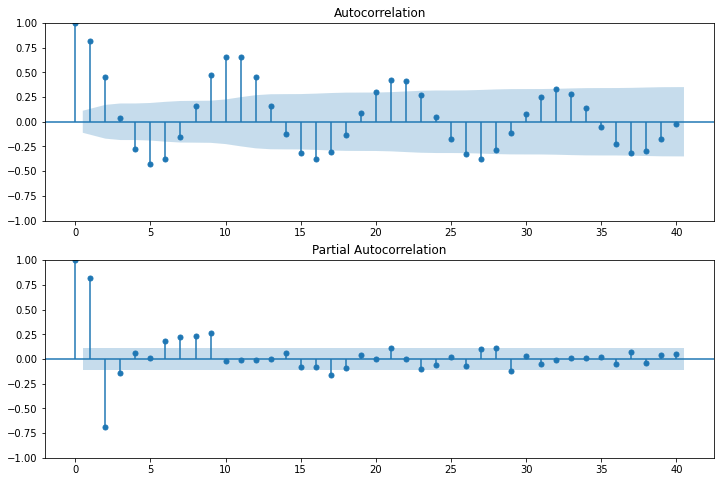

In [10]:
fig = plt.figure(figsize = (12, 8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.values.squeeze(), lags = 40, ax = ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data, lags = 40, ax = ax2)

# ARMA(2, 0)

In [14]:
arma_mod20 = ARIMA(data, order = (2, 0, 0)).fit()
print(arma_mod20.params)
print()
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

const      49.746198
ar.L1       1.390633
ar.L2      -0.688573
sigma2    274.727181
dtype: float64

2622.6370933008184 2637.570458408409 2628.6074811460644


# ARMA(3, 0)

In [15]:
arma_mod30 = ARIMA(data, order = (3, 0, 0)).fit()
print(arma_mod30.params)
print()
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

const      49.751912
ar.L1       1.300818
ar.L2      -0.508102
ar.L3      -0.129644
sigma2    270.101140
dtype: float64

2619.4036292456663 2638.070335630155 2626.8666140522237


## Durbin-Watson test

### 残差

In [16]:
sm.stats.durbin_watson(arma_mod30.resid.values)

1.9564953616090044

### 残差图

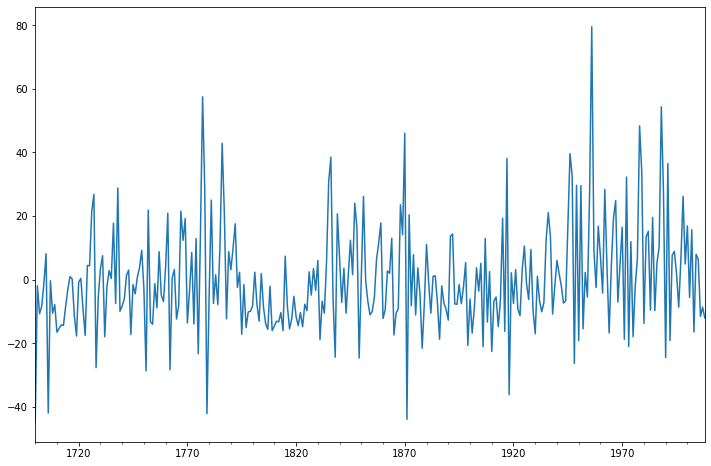

In [17]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax = ax)

### 残差正态性检验

In [18]:
resid = arma_mod30.resid
stats.normaltest(resid)

NormaltestResult(statistic=49.843932188649774, pvalue=1.5015079882540518e-11)

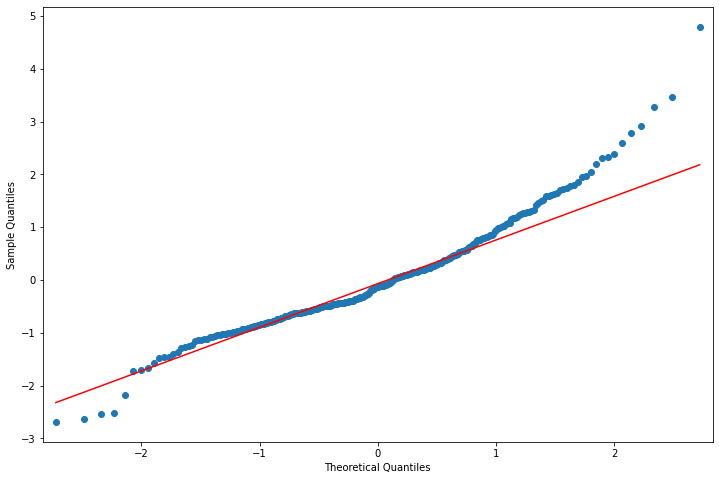

In [19]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line = "q", ax = ax, fit = True)

### 残差 ACF 和 PACF

/Users/zfwang/.pyenv/versions/ts/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


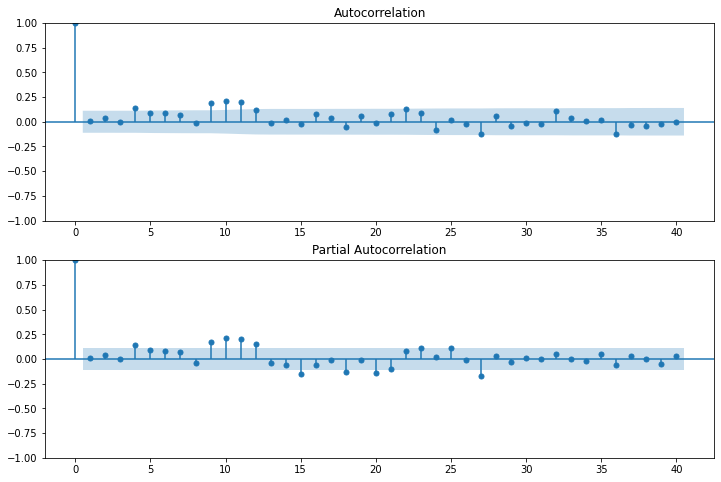

In [20]:
fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags = 40, ax = ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags = 40, ax = ax2)

In [27]:
r, q, p = sm.tsa.acf(resid.values.squeeze(), fft = True, qstat = True)
dat = np.c_[np.arange(1, 25), r[1:], q, p]
table = pd.DataFrame(dat, columns = ["lag", "AC", "Q", "Prob(>Q)"])
print(table.set_index("lag"))

            AC          Q      Prob(>Q)
lag                                    
1.0   0.009170   0.026239  8.713184e-01
2.0   0.041793   0.572982  7.508939e-01
3.0  -0.001338   0.573544  9.024612e-01
4.0   0.136086   6.408642  1.706385e-01
5.0   0.092465   9.111351  1.047043e-01
6.0   0.091947  11.792661  6.675737e-02
7.0   0.068747  13.296552  6.520425e-02
8.0  -0.015022  13.368601  9.978086e-02
9.0   0.187590  24.641072  3.394963e-03
10.0  0.213715  39.320758  2.230588e-05
11.0  0.201079  52.359565  2.346490e-07
12.0  0.117180  56.802479  8.580351e-08
13.0 -0.014057  56.866630  1.895209e-07
14.0  0.015398  56.943864  4.000370e-07
15.0 -0.024969  57.147642  7.746546e-07
16.0  0.080916  59.295052  6.876728e-07
17.0  0.041138  59.852008  1.111674e-06
18.0 -0.052022  60.745723  1.549418e-06
19.0  0.062496  62.040010  1.832778e-06
20.0 -0.010303  62.075305  3.383285e-06
21.0  0.074453  63.924941  3.195540e-06
22.0  0.124954  69.152954  8.984238e-07
23.0  0.093162  72.069214  5.803579e-07


## 预测

In [25]:
predict_sunspots = arma_mod30.predict("1990", "2012", dynamic = True)
print(predict_sunspots)

1990-12-31    167.048337
1991-12-31    140.995022
1992-12-31     94.862115
1993-12-31     46.864439
1994-12-31     11.246106
1995-12-31     -4.718265
1996-12-31     -1.164628
1997-12-31     16.187246
1998-12-31     39.022948
1999-12-31     59.450799
2000-12-31     72.171269
2001-12-31     75.378329
2002-12-31     70.438480
2003-12-31     60.733987
2004-12-31     50.204383
2005-12-31     42.078584
2006-12-31     38.116648
2007-12-31     38.456730
2008-12-31     41.965644
2009-12-31     46.870948
2010-12-31     51.424878
2011-12-31     54.401403
2012-12-31     55.323515
Freq: A-DEC, Name: predicted_mean, dtype: float64


In [29]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

mean_forecast_err(data.SUNACTIVITY, predict_sunspots)

5.634832966885551

# ARMA(4, 1)

In [30]:
from statsmodels.tsa.arima_process import ArmaProcess

np.random.seed(1234)
ar_params = np.array([1, 0.75, -0.65, -0.55, 0.9])
ma_params = np.array([1, 0.65])

In [33]:
arma_t = ArmaProcess(ar_params, ma_params)

In [34]:
arma_t.isinvertible

True

In [32]:
arma_t.isstationary

False

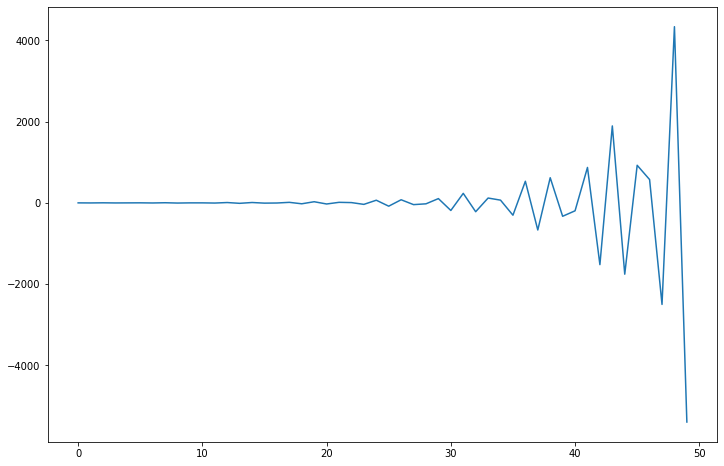

In [38]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
ax.plot(arma_t.generate_sample(nsample = 50))